In [138]:
# Обязательные пакеты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Допишите необходимые вам пакеты

from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
###
#      ВНИМАНИЕ БЛОК ЗАПРЕЩЕНО МЕНЯТЬ !!!
###
# считайте данные
df = pd.read_csv('titanic_train.csv')[:-20]
df_test = pd.read_csv('titanic_train.csv')[-20:]
#  
# Обозначение полей
# Survival	Выжил	0 = нет, 1 = да
# Pclass	Класс билета	1 = 1-ый, 2 = 2-ой, 3 = 3-ий
# Sex	пол	
# Age	возраст	
# Sibsp	братья и сестры / супруги на борту	
# Parch	родители / дети на борту	
# Ticket	номер билета	
# Fare	Цена билета	
# cabin	Номер каюты	
# embarked	Порт посадки	C = Cherbourg, Q = Queenstown, S = Southampton
#
# обязательная строка
display(df.head())
display(df.info())
display(df_test.head())
display(df_test.info())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1089 non-null   int64  
 1   Pclass    1089 non-null   int64  
 2   Name      1089 non-null   object 
 3   Sex       1089 non-null   object 
 4   Age       873 non-null    float64
 5   SibSp     1089 non-null   int64  
 6   Parch     1089 non-null   int64  
 7   Ticket    1089 non-null   object 
 8   Fare      1088 non-null   float64
 9   Cabin     249 non-null    object 
 10  Embarked  1087 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 93.7+ KB


None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1089,0,2,"Baimbrigge, Mr. Charles Robert",male,23.00,0,0,C.A. 31030,10.5000,NaN,S
1090,1,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S
1091,1,3,"Murphy, Miss. Nora",female,NaN,0,0,36568,15.5000,NaN,Q
1092,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1093,0,1,"Astor, Col. John Jacob",male,47.00,1,0,PC 17757,227.5250,C62 C64,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 1089 to 1108
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  20 non-null     int64  
 1   Pclass    20 non-null     int64  
 2   Name      20 non-null     object 
 3   Sex       20 non-null     object 
 4   Age       15 non-null     float64
 5   SibSp     20 non-null     int64  
 6   Parch     20 non-null     int64  
 7   Ticket    20 non-null     object 
 8   Fare      20 non-null     float64
 9   Cabin     3 non-null      object 
 10  Embarked  20 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ KB


None

In [13]:
###
#      Блок(и) работы по настройке Вашей модели ТОЛЬКО на данных df !!! 
#      Внимание!  df_test использовать запрещено !!!
###

cat = ['Embarked','Sex','Pclass']
num = ['Age','Fare','SibSp','Parch']

ohe = OneHotEncoder()

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df['Embarked'].replace({'S':1, 'C':2, 'Q':3, np.nan:0},inplace=True)
df['Sex'].replace({'male':1,'female':0},inplace=True)

In [16]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)  #не несут практически никакой информации

In [24]:
df = df.fillna(df.mean())
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [71]:
df.mean()

Survived     0.382002
Pclass       2.303030
Sex          0.643710
Age         29.860447
SibSp        0.514233
Parch        0.386593
Fare        32.968608
Embarked     1.383838
dtype: float64

In [30]:
ohe.fit(df[cat])
onehotlabels = ohe.transform(df[cat]).toarray()

In [81]:
df_train = pd.concat([df.drop(cat,axis=1),pd.DataFrame(onehotlabels)],axis=1)
df_train.head()

,Survived,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7,8
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7,8
0,0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
###
#     Блок обучения итоговой модели. 
#     1. Препроцессинг для df
#     2. Настройка итоговой модели с названием model 
###
X = df_train.drop('Survived',axis=1)
y = df_train.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [59]:
grid = {'n_estimators':[100,200,500],
       'max_depth':np.arange(2,10),
       'criterion':['gini','entropy']}
model = RandomForestClassifier()

In [60]:
cv = GridSearchCV(model,grid,n_jobs=-1,cv=7)

In [61]:
cv.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [62]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 500}

In [63]:
cv.score(X_test,y_test)

0.8901098901098901

In [41]:
from xgboost import XGBClassifier

In [42]:
xgb = XGBClassifier()
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [43]:
params = {'max_depth':np.arange(1,10),
         'learning_rate':[0.01,0.1,0.2]}

In [44]:
cvXGB = GridSearchCV(xgb,params,n_jobs=-1,cv=5)

In [45]:
cvXGB.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=

In [46]:
cvXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [47]:
accuracy_score(cvXGB.predict(X_test),y_test)

0.8058608058608059

# best model - RandomForest (0.89)

In [144]:
model = cv

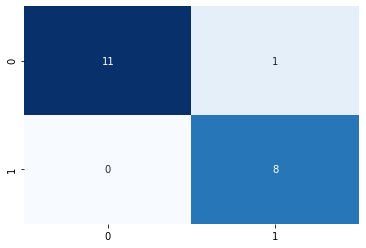

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Правильность на контрольном наборе: 0.9500000000
f1 на контрольном наборе: 0.9411764706


In [145]:
###
#     Блок тестирования итоговой модели. 
#     1. Препроцессинг для df_t = df_test, будьте аккуратны никаких fit!
#     2. тестирование model на данных из df_test, будьте аккуратны никаких fit! 
#        истинные данные обозначаются X_t 
#        истинные значения обозначаются y_t
###
df_t = df_test.copy() # код не менять, далее работать с DataFrame df_t
###
#  препроцессинг и модель (ниже) 
###
df_t = df_test.copy()
df_t.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df_t['Embarked'].replace({'S':1, 'C':2, 'Q':3, np.nan:0},inplace=True)
df_t['Sex'].replace({'male':1,'female':0},inplace=True)

df_t = df_t.fillna(df.mean())  #т.к. тренировочная выборка больше по ЗБЧ результаты ближе к реальности
df_t.head()

ohelabels = ohe.transform(df_t[cat]).toarray()
df_t = pd.concat([df_t.drop(cat,axis=1).reset_index(drop=True),pd.DataFrame(ohelabels)],axis=1)

y_t = df_t.Survived
X_t = df_t.drop('Survived',axis=1)


###
# Код в самом конце изменению не подлежит!
###
y_pred=model.predict(X_t)
matrix=confusion_matrix(y_t,y_pred)
sns.heatmap(matrix,annot=True, fmt='g', cbar=None,cmap="Blues")
plt.show()
report = classification_report(y_t, y_pred)
print(report)
print('Правильность на контрольном наборе: {:.10f}'.format(model.score(X_t, y_t)))
print('f1 на контрольном наборе: {:.10f}'.format(f1_score(y_t, y_pred,labels=[0,1])))